## Review how to plot
To plot the classic data, we can use the `matplotlib` library. Here is an example code:

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # Windows: 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 防止负号显示异常

In [22]:
# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

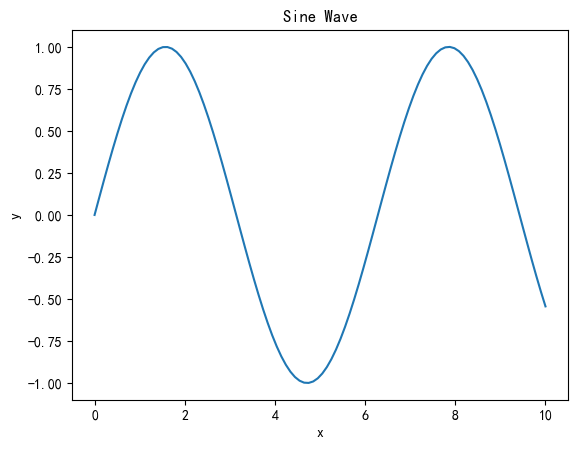

In [23]:
# Plot the data
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Wave')
plt.show()

In [24]:
from time import sleep
def acc(r,k=1,Z1=2,Z2=79,m=1):
    x,y = r[0],r[1]
    r_abs = np.sqrt(x**2+y**2)
    return k * Z1 * Z2 *r /r_abs**3

In [25]:
# number of alpha particles
num_alpha = 10

In [26]:
# number of time steps
steps = 300

In [27]:
# time interval
dt=0.01

In [28]:
plt.figure()
from IPython.display import clear_output

<Figure size 640x480 with 0 Axes>

In [29]:
# for n in range(num_alpha):
#     history = np.zeros(shape=(steps, 2))
#     # alpha 粒子初始位置
#     x0 = -5
#     # alpha 粒子初始位置的y坐标，随机生成
#     y0 = np.random.uniform(-5, 5)
#     r = np.array([x0, y0])
#     # alpha 粒子初始速度
#     v = np.array([10, 0])
# 
#     for i in range(steps):
#         history[i] = r
#         # 使用速度 verlet 公式更新位置坐标和速度
#         a0 = acc(r)
#         r = r + v * dt + 0.5 * a0 * dt**2
#         a1 = acc(r)
#         v = v + 0.5 * (a0 + a1) * dt
#         # 画出横线，alpha 粒子，金原子核
#         plt.hlines(y=0, xmin=-10, xmax=10, linestyles='dashed')
#         plt.plot([0], [0], 'ro', ms=20)
#         plt.plot([r[0]], [r[1]], 'ko')
#         # 画出 alpha 粒子的历史轨迹
#         plt.plot(history[:i+1, 0], history[:i+1, 1], 'k-')
#         plt.xlim(-10, 10)  # 确定画布的 x 范围
#         plt.ylim(-10, 10)  # 确定画布的 y 范围
#         plt.xlabel("x")
#         plt.ylabel("y")
#         plt.show()
#         sleep(0.01)
#         clear_output()

接下来我们将用 `matplotlib` 绘制多个 α 粒子的轨迹，并用 `colormap` 为每个粒子分配颜色。
不再观看轨迹形成的动画，而是绘制出所有粒子的轨迹

粒子选用alpha粒子轰击金原子核的例子，可以更好地展示轨迹的变化。
势能场是有心力场，可以模拟粒子受到外力的影响。
也就是卢瑟福散射模型。

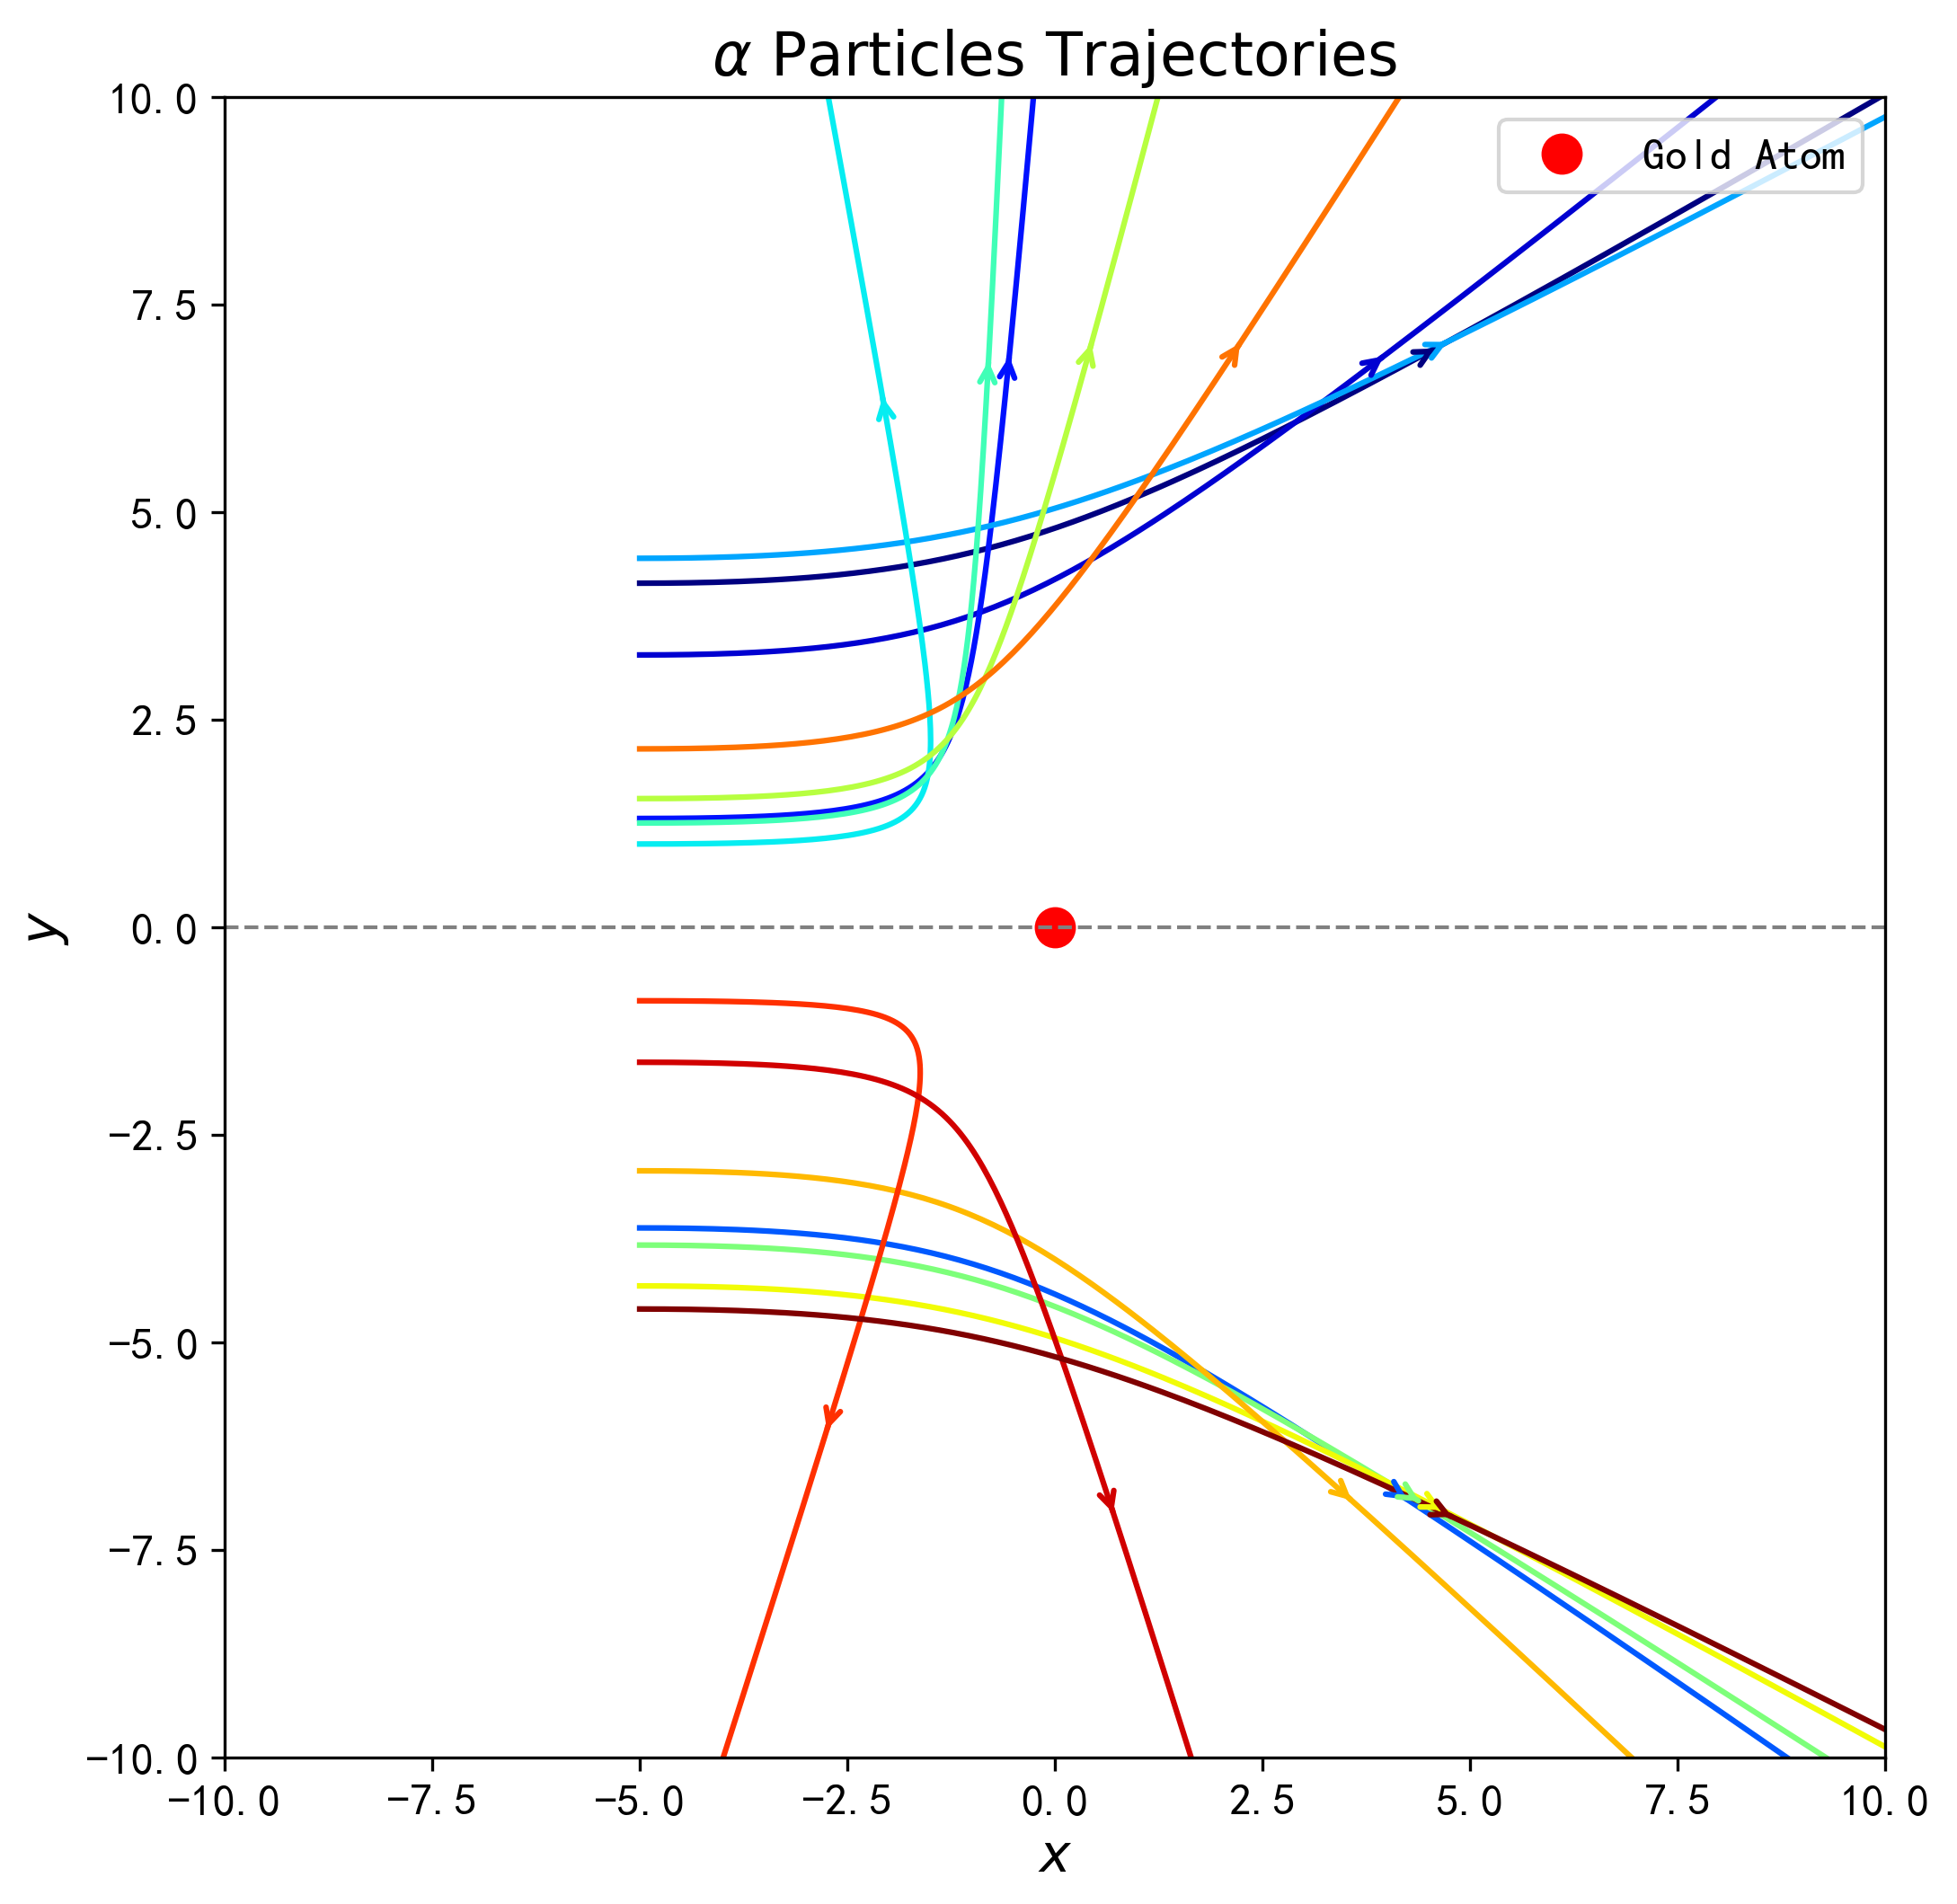

In [30]:
import numpy as np
import matplotlib.pyplot as plt
num_alpha = 15

# 为每个粒子分配颜色
colors = plt.cm.jet(np.linspace(0, 1, num_alpha))
trajectories = []

for n in range(num_alpha):
    trajectory = np.zeros((steps, 2))
    x0 = -5
    y0 = np.random.uniform(-5, 5)
    r = np.array([x0, y0])
    v = np.array([10, 0])
    
    for i in range(steps):
        trajectory[i] = r
        a0 = acc(r)
        r = r + v * dt + 0.5 * a0 * dt**2
        a1 = acc(r)
        v = v + 0.5 * (a0 + a1) * dt
    trajectories.append(trajectory)

fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
ax.plot(0, 0, 'ro', ms=10, label="Gold Atom")
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

for n, trajectory in enumerate(trajectories):
    ax.plot(trajectory[:, 0], trajectory[:, 1], color=colors[n], linewidth=1.5)
    
        # 选择在轨迹的？位置添加箭头
    arrow_index = int(len(trajectory) * 0.35)
    # 确保不会超出数组边界
    if arrow_index < len(trajectory) - 1:
        start_point = trajectory[arrow_index]
        end_point = trajectory[arrow_index + 1]
        ax.annotate('', xy=end_point, xytext=start_point,
                    arrowprops=dict(arrowstyle='->', color=colors[n], lw=1.5))


ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$y$", fontsize=14)
ax.set_title(r"$\alpha\ \mathrm{Particles\ Trajectories}$", fontsize=16)
ax.legend(fontsize=12, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_aspect('equal')
fig.savefig('./output/alpha_particles_with_arrows.png', bbox_inches='tight')
plt.show()


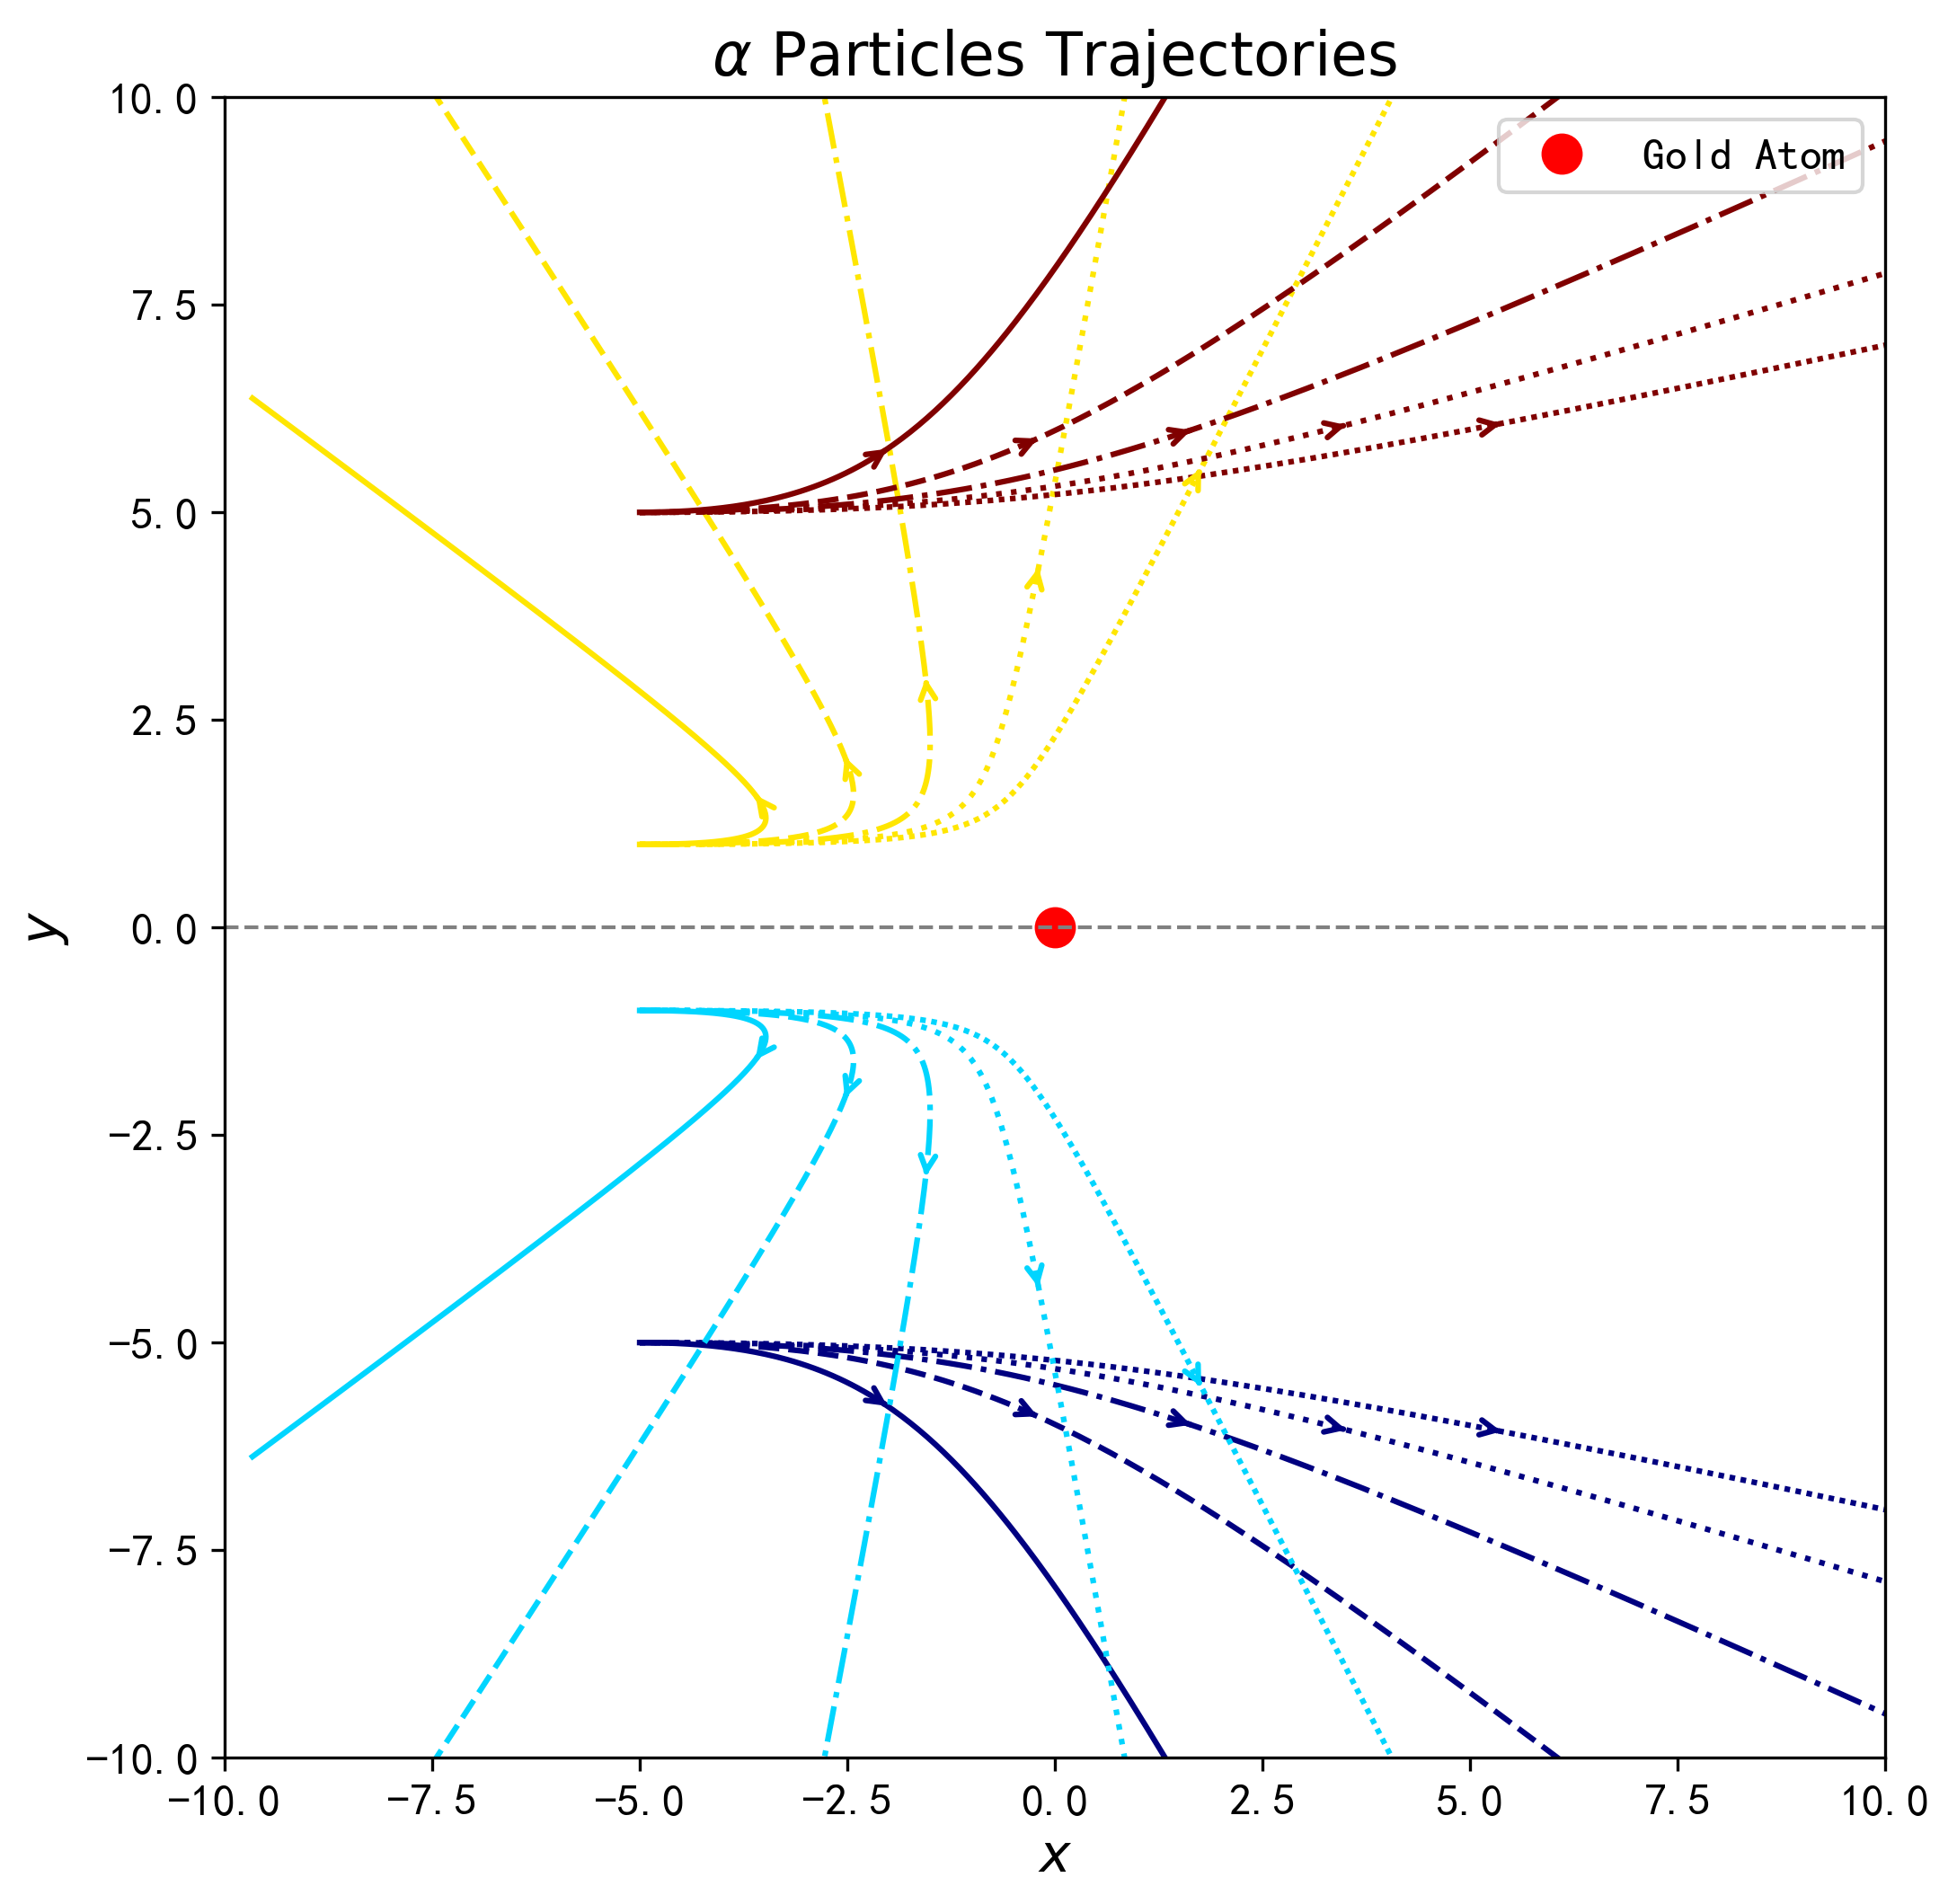

In [31]:
import numpy as np
import matplotlib.pyplot as plt

num_alpha = 4  # 不同方向的数量
steps = 200     # 时间步数
dt = 0.01       # 时间步长

# 设定不同的入射速度
speeds = np.linspace(5, 15, 5)

# 为不同方向分配颜色
direction_colors = plt.cm.jet(np.linspace(0, 1, num_alpha))
# 为不同速度设定不同线型（也可以用其他方式区分）
line_styles = ['-', '--', '-.', ':', (0, (1, 1))]

# 存储所有粒子的轨迹，方便后续分析或绘图
# trajectories 是一个字典，key 为方向编号，每个值为不同速度对应的轨迹列表
trajectories = {}
y_places = [-5, -1,1, 5]
for n in range(num_alpha):
    # 随机确定入射方向：固定 x0=-5, y0 随机（同一方向）
    x0 = -5
    y0 = y_places[n]
    # 对于该方向，保存 5 个不同速度的轨迹
    traj_list = []
    for j, v0 in enumerate(speeds):
        trajectory = np.zeros((steps, 2))
        r = np.array([x0, y0])
        # 初始速度方向固定为 x 轴正方向，幅值为 v0
        v = np.array([v0, 0])
        
        for i in range(steps):
            trajectory[i] = r
            a0 = acc(r)
            r = r + v * dt + 0.5 * a0 * dt**2
            a1 = acc(r)
            v = v + 0.5 * (a0 + a1) * dt
        traj_list.append(trajectory)
    trajectories[n] = traj_list

# 绘制轨迹
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
# 绘制金原子核（假设位于原点）
ax.plot(0, 0, 'ro', ms=10, label="Gold Atom")
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

# 循环绘制每个方向以及该方向下不同速度的粒子轨迹
for n, traj_list in trajectories.items():
    for j, trajectory in enumerate(traj_list):
        # 使用相同的颜色表示同一方向，线型区分不同入射速度
        ax.plot(trajectory[:, 0], trajectory[:, 1],
                color=direction_colors[n],
                linestyle=line_styles[j],
                linewidth=1.5)
        # 在轨迹上选择箭头位置，这里选取轨迹约 35% 处添加箭头
        arrow_index = int(len(trajectory) * 0.35)
        if arrow_index < len(trajectory) - 1:
            start_point = trajectory[arrow_index]
            end_point = trajectory[arrow_index + 1]
            ax.annotate('', xy=end_point, xytext=start_point,
                        arrowprops=dict(arrowstyle='->',
                                        color=direction_colors[n],
                                        lw=1.5))
            
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$y$", fontsize=14)
ax.set_title(r"$\alpha\ \mathrm{Particles\ Trajectories}$", fontsize=16)
ax.legend(fontsize=12, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_aspect('equal')
fig.savefig('./output/alpha_particles_with_different_speeds.png', bbox_inches='tight')
plt.show()


展示了二维后，考虑三维的情况，可以用 `matplotlib` 的 `mplot3d` 库来绘制三维图。

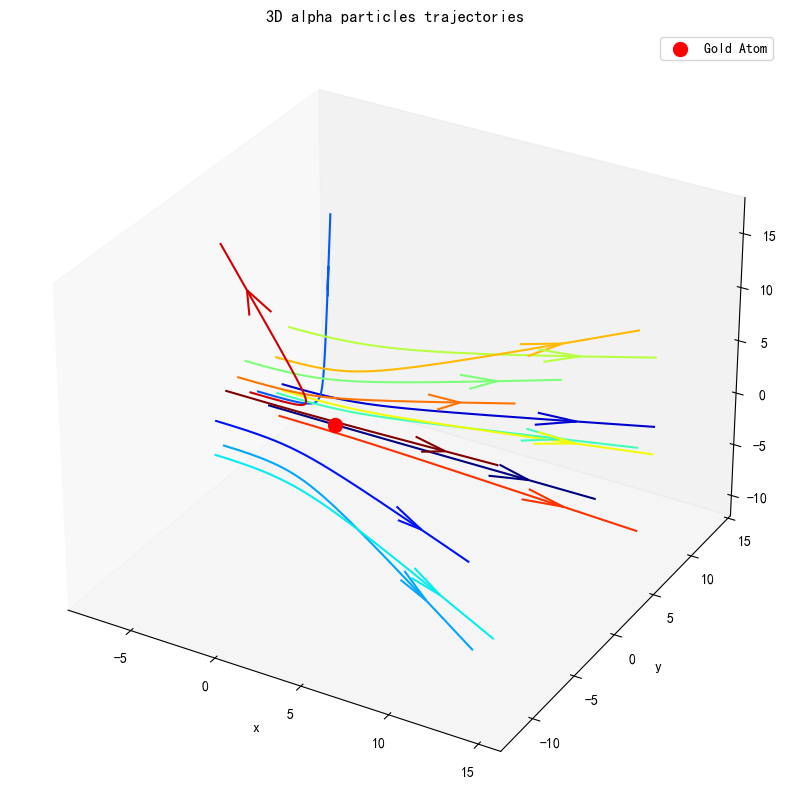

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

def acc(r, k=1, Z1=2, Z2=79, m=1):
    r_abs = np.linalg.norm(r)
    return k * Z1 * Z2 * r / r_abs**3

# 模拟参数
num_alpha = 15  # α 粒子数量
steps = 200     # 时间步数
dt = 0.01       # 时间步长

# 利用 colormap 为每个粒子分配颜色
colors = plt.cm.jet(np.linspace(0, 1, num_alpha))

# 存储所有粒子的轨迹，每个轨迹的 shape 为 (steps, 3)
trajectories = []

# 对每个 α 粒子进行模拟
for n in range(num_alpha):
    trajectory = np.zeros((steps, 3))
    # 初始位置：x 固定为 -5，y 和 z 均随机在 [-5,5] 之间
    x0 = -5
    y0 = np.random.uniform(-5, 5)
    z0 = np.random.uniform(-5, 5)
    r = np.array([x0, y0, z0])
    # 初始速度，沿 x 轴方向
    v = np.array([10, 0, 0])
    
    for i in range(steps):
        trajectory[i] = r  # 记录当前位置
        
        # 计算当前位置的加速度
        a0 = acc(r)
        # 使用速度 Verlet 方法更新位置
        r = r + v * dt + 0.5 * a0 * dt**2
        # 计算更新后位置的加速度
        a1 = acc(r)
        # 更新速度
        v = v + 0.5 * (a0 + a1) * dt
    
    trajectories.append(trajectory)

# 三维绘图：将每个粒子的轨迹以不同颜色绘制在同一图中
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制金原子核（假设在原点）
ax.scatter(0, 0, 0, color='r', s=100, label="Gold Atom")

# 循环绘制每个 α 粒子的轨迹，并在轨迹上添加箭头
for n, trajectory in enumerate(trajectories):
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2],
            color=colors[n])
    
    
    arrow_index = int(len(trajectory) * 0.8)
    if arrow_index < len(trajectory) - 1:
        start_point = trajectory[arrow_index]
        end_point = trajectory[arrow_index + 1]
        vector = end_point - start_point
        scale_factor = 2  # 调整放大倍数
        vector = vector * scale_factor
        ax.quiver(start_point[0], start_point[1], start_point[2],
                  vector[0], vector[1], vector[2],
                  arrow_length_ratio=10, color=colors[n], pivot='tail')

ax.grid(False)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D alpha particles trajectories")
ax.legend()
fig.savefig('./output/alpha_particles_3d.png', bbox_inches='tight')
plt.show()


下面通过蒙特卡洛模拟来验证我们公式的正确性


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # 引入进度条库

e = 1.602e-19        
epsilon0 = 8.854e-12  
hbar = 1.0545718e-34  

Z = 79                
q = 2 * e             
Q = Z * e             
u_mass = 1.660539e-27 
mu = 4 * u_mass       

E_MeV = 5.0
E = E_MeV * 1.602e-13 

C = q * Q / (8 * np.pi * epsilon0 * E)

def verlet_integration(N, dt, max_steps=1000):
    """ 使用Verlet积分法模拟粒子散射，并统计散射角 """
    positions = np.random.uniform(-1e-10, 1e-10, (N, 2))  # 避免所有粒子初始在原点
    velocities = np.zeros((N, 2))  
    
    velocities[:, 0] = np.sqrt(2 * E / mu)  # 沿 x 方向给初始速度

    angles = []  

    with tqdm(total=N, desc="模拟进度", unit="粒子") as pbar:
        for i in range(N):
            position = positions[i]
            velocity = velocities[i]

            for _ in range(max_steps):
                r = np.linalg.norm(position)
                if r < 1e-15:  
                    break  # 避免无效计算
                
                force = (q * Q) / (4 * np.pi * epsilon0 * r**2)
                direction = -position / r  
                force_vector = force * direction
                
                new_position = position + velocity * dt + 0.5 * force_vector / mu * dt**2
                new_velocity = velocity + 0.5 * force_vector / mu * dt
                
                position = new_position
                velocity = new_velocity

                if np.linalg.norm(position) > 2 * C: 
                    theta = np.arctan2(position[1], position[0])  
                    angles.append(np.abs(np.degrees(theta)))  
                    break

            pbar.update(1)  # 更新进度条

    return np.array(angles)



In [37]:
N = 10**7
dt = 5e-15
import os

# 读取缓存结果
if not os.path.exists('./cache/alpha_particles_angles_mc.npy'):
    angles_deg = verlet_integration(N, dt)
else:
    angles_deg = np.load('./cache/alpha_particles_angles_mc.npy')
# 缓存结果
if not os.path.exists('./cache'):
    os.makedirs('./cache')
np.save('./cache/alpha_particles_angles_mc.npy', angles_deg)



C:\Users\glue\AppData\Local\Temp\ipykernel_25724\369649592.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm_const = np.trapz(unnorm_pdf, theta_rad)


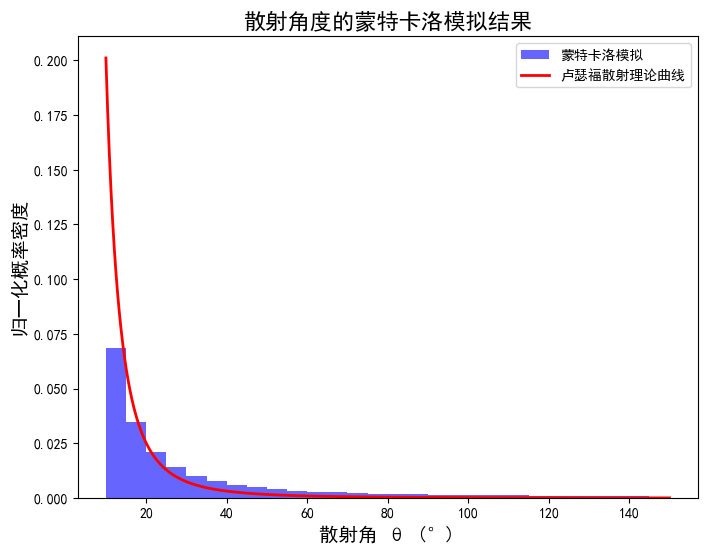

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(angles_deg, bins=np.arange(10, 150, 5), density=True, 
         alpha=0.6, color='b', label="蒙特卡洛模拟")


theta_deg = np.linspace(10, 150, 1000)
theta_rad = np.deg2rad(theta_deg)  # 转换为弧度

unnorm_pdf = 2 * np.cos(theta_rad / 2) / (np.sin(theta_rad / 2) ** 3)

# 归一化
norm_const = np.trapz(unnorm_pdf, theta_rad)
pdf_rad = unnorm_pdf / norm_const
pdf_deg = pdf_rad * (np.pi / 180)

# 绘制理论曲线（折线图）
plt.plot(theta_deg, pdf_deg, 'r-', lw=2, label="卢瑟福散射理论曲线")

plt.xlabel("散射角 θ (°)", fontsize=14)
plt.ylabel("归一化概率密度", fontsize=14)
plt.title("散射角度的蒙特卡洛模拟结果", fontsize=16)
plt.legend()
plt.savefig('./output/alpha_particles_angles_with_monte_carlo.png', bbox_inches='tight')
plt.show()
